**Customer Churn Analysis**

In this project we will investigate The Telco company customer dataset and would like to get some insights about the customers. Customer churn analysis is when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.

There are some types of customer churns which are :

* Contractual Churn : When a customer is under a contract for a service and decides to cancel the service e.g. cable TV, SaaS.

* Voluntary Churn : When a user voluntarily cancels a service e.g. cellular connection.

* Non-Contractual Churn : When a customer is not under a contract for a service and decides to cancel the service e.g. consumer loyalty in retail stores.

* Involuntary Churn : When a churn occurs without any request of the customer
e.g. credit card expiration.

Based on these churn types especially according to the voluntary churn if there may be lack of usage, poor service or better price proposition from another service etc. customer may cancel the service.

**Dataset Description**

The Telco company customer churn dataset contains information about customer demographics, services subscribed, contract details, and churn status.

Our objective in here is to analyze this data and develop a model that predicts whether a customer is likely to churn or not.

Generally we can define the churn analysis as the whole of analytical studies on “a customer”, “a product or service”, and “the probability of abandonment”.

We aim to be aware of this situation (even the customer himself may not be aware of this situation) before the customer leaves us (approaching to leave) and then to take some preventive actions. Because for example in particular, given millions of Telco customers, even reducing the 1% churn rate will lead to a significant profit increase.











In [3]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the dataset
dataset = pd.read_csv('/content/drive/MyDrive/telco_dataset.csv', index_col=0)

In [4]:
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
dataset.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
dataset.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
dataset.shape

(3333, 21)

**Exploratory Data Analysis**

In [8]:
#to find the churners
dataset['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In here we can see that we have 483 churners and 2850 non-churners.

In [9]:
#grouping data by churn
dataset.groupby('churn')['customer service calls'].mean()

churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64

In [10]:
#dropping the phone number column
dataset.drop('phone number', axis=1, inplace=True)

According to this grouping we can say that churners seem to make more customer service calls than non-churners.

Let's check the states:

In [11]:
dataset.groupby('state')['churn'].value_counts()

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64

In here we can see that California has a high number of customers who churned.

**Exploratory Data Visualizations**

In this section we will try to see how variables in our dataset are distributed.

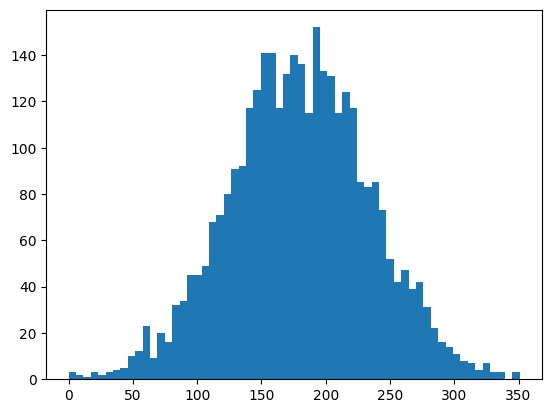

In [12]:
#visualize the distribution of 'Total day minutes'
plt.hist(dataset['total day minutes'], bins = 61)

#display the plot
plt.show()

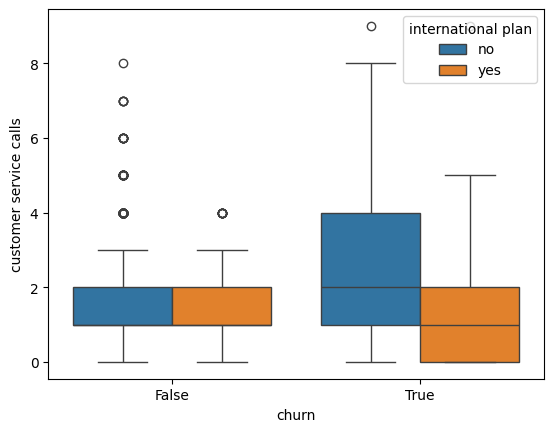

In [17]:
#create the box plot
sns.boxplot(x = 'churn',y = 'customer service calls',
            data = dataset,hue = "international plan")
#display the plot
plt.show()

In here we can see that customers who do churn end up leaving more customer service calls.



**Data Preprocessing**

In Telco company churn data, "churn, voice mail plan, and international plan" are binary features that can easily be converted into 0s and 1s.



In [18]:
dataset.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
dataset.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [20]:
X = dataset.iloc[:, 0:19].values #features
X

array([['KS', 128, 415, ..., 3, 2.7, 1],
       ['OH', 107, 415, ..., 3, 3.7, 1],
       ['NJ', 137, 415, ..., 5, 3.29, 0],
       ...,
       ['RI', 28, 510, ..., 6, 3.81, 2],
       ['CT', 184, 510, ..., 10, 1.35, 2],
       ['TN', 74, 415, ..., 4, 3.7, 0]], dtype=object)

In [21]:
y = dataset.iloc[:, 19].values #labels (churn)
y

array([False, False, False, ..., False, False, False])

In [23]:
#encoding categorical data of the dataset in X
from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
X[:, 3] = labelencoder1.fit_transform(X[:, 3])
labelencoder2 = LabelEncoder()
X[:, 4] = labelencoder2.fit_transform(X[:, 4])

#encoding categorical data in y
labelencodery = LabelEncoder()
y = labelencodery.fit_transform(y)

In [27]:
#encoding state feature using one hot encoding
#removing extra column to avoid dummy variable trap
X_State = pd.get_dummies(X[:, 0], drop_first = True)

#converting X to a dataframe
X = pd.DataFrame(X)

#dropping the 'state' column in the X dataframe
X = X.drop([0], axis = 1)

#merging two dataframes
result_X = pd.concat([X_State, X], axis = 1, ignore_index = True)

#final dataset with all numeric features
X = result_X

In [28]:
X

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0,0,0,0,0,0,0,0,0,0,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,0,0,0,0,0,0,0,0,0,0,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1
2,0,0,0,0,0,0,0,0,0,0,...,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0
3,0,0,0,0,0,0,0,0,0,0,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,0,0,0,0,0,0,0,0,0,...,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,0,0,0,0,0,0,0,...,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,0,0,0,0,0,0,0,0,0,0,...,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,0,0,0,0,0,0,0,0,0,0,...,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,0,0,0,0,0,1,0,0,0,0,...,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


**Modeling Our Data**

In here we will try to model our data and we will use RandomForest algorithm.

In [29]:
#splitting the dataset into the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
																										test_size = 0.2,
																										random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#instantiate the classifier
clf = RandomForestClassifier()

#fit to the training data
clf.fit(X_train, y_train)

#predict the labels for the test set
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

**Evaluating Our Model Performance**

In [31]:
#compute accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9505247376311844


In [32]:
#creating our confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[575   4]
 [ 29  59]]


According the confusion matrix we see that :

* True Positives(TP)    = 575
* False Positives(FP)   = 4
* True Negatives(TN)    = 59
* False Negatives(FN)   = 29

From the confusion matrix, we can compute the following metrics also :

In [33]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       579
           1       0.94      0.67      0.78        88

    accuracy                           0.95       667
   macro avg       0.94      0.83      0.88       667
weighted avg       0.95      0.95      0.95       667



**Conclusion**

In here at last we can see that according to our customer churn algorithm we can see that we reached a 0.95 accuracy score. This is a good score but when we check our classification report we see our recall score is low.

There are a few things we can do to improve the recall score of our model. For example we can increase the number of trees or maximum depth etc or we can use another algorithm.

Random forests are a good all-around algorithm, but they may not be the best choice for our problem in here and we may try using a different algorithm also.